In [104]:
import pandas as pd

In [125]:
data = pd.read_pickle('data.pickle')

df = data.groupby(data['model']).sum(numeric_only=True)

df['Brier score'] = round(df['Brier score'] / 10, 6)
df['precision'] = round(df['precision'] / 10, 3)
df['recall'] = round(df['recall'] / 10, 3)
df['F1 score'] = round(df['F1'] / 10, 3)
df['profit'] = round(df['profit'] / 10, 4)
df['modified Brier score'] = round(df['modified Brier score'] / 10, 6)

df_mbs = df[['modified Brier score']].sort_values(['modified Brier score'], ascending=True)
df_mbs.to_csv('tables/mbs.csv')
df = df.drop(columns=['modified Brier score'])

df_profit = df.drop(columns=['Brier score','precision', 'recall', 'F1 score', 'F1'])
df_profit = df_profit.sort_values(['profit'], ascending=False)

df = df.drop(columns=['profit', 'F1'])

df_brier = df.drop(columns=['precision', 'recall', 'F1 score'])
df_brier = df_brier.sort_values(['Brier score'], ascending=True)
df_brier.to_csv('tables/brier.csv')

df_other = df.drop(columns=['Brier score'])
df_other = df_other.sort_values(['F1 score'], ascending=False)
df_other.to_csv('tables/F1.csv')


df.to_csv('tables/metrics.csv')

df_mbs

,modified Brier score
model,
Neural network,0.062052
Bayesian network,0.072748
Naive Bayes,0.076137
k-NN,0.159308


In [126]:
df_profit.to_csv('tables/profit.csv')

In [127]:
# calculating the precision and recall of trivial model

data__ = pd.read_pickle('../simulation/input_data.pickle')

percentage_of_home_wins = 0

for id, row in data__.iterrows():
    if row.result == 'home win':
        percentage_of_home_wins += 1 / len(data__)

percentage_of_home_wins

0.4583835946924047

In [128]:
data

,index,model,Brier score,precision,recall,F1,confusion_matrix,profit,modified Brier score
0,0,Naive Bayes,0.645537,0.610811,0.715190,0.658892,"[[113, 6, 39], [34, 12, 26], [38, 12, 51]]",-0.022870,0.093121
0,1,Neural network,0.613954,0.621429,0.550633,0.583893,"[[87, 12, 59], [26, 13, 33], [27, 12, 62]]",0.093746,0.073383
0,2,k-NN,0.729426,0.540541,0.759494,0.631579,"[[120, 15, 23], [46, 8, 18], [56, 17, 28]]",0.031208,0.153728
0,3,Bayesian network,0.729426,0.540541,0.759494,0.631579,"[[120, 15, 23], [46, 8, 18], [56, 17, 28]]",0.031208,0.153728
0,4,Naive Bayes,0.602023,0.565934,0.677632,0.616766,"[[103, 11, 38], [42, 8, 26], [37, 9, 57]]",-0.140393,0.058105
0,5,Neural network,0.624752,0.589286,0.651316,0.618750,"[[99, 51, 2], [32, 40, 4], [37, 47, 19]]",-0.252991,0.079742
0,6,k-NN,0.666344,0.522727,0.756579,0.618280,"[[115, 21, 16], [51, 14, 11], [54, 19, 30]]",-0.165196,0.151911
0,7,Bayesian network,0.616769,0.496479,0.927632,0.646789,"[[141, 1, 10], [68, 0, 8], [75, 1, 27]]",-0.076979,0.075552
0,8,Naive Bayes,0.646974,0.601093,0.714286,0.652819,"[[110, 16, 28], [41, 15, 28], [32, 13, 47]]",-0.126242,0.085236
0,9,Neural network,0.613374,0.569948,0.714286,0.634006,"[[110, 0, 44], [45, 2, 37], [38, 0, 54]]",-0.218636,0.053370


In [129]:
confusion_matrixes = {
    'Naive Bayes': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'Neural network': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'k-NN':[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'Bayesian network': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
}

for _, row in data.iterrows():
    matrix = confusion_matrixes[row.model]
    matrix_2 = row.confusion_matrix
    confusion_matrixes[row.model] = [[matrix[i][j] + matrix_2[i][j]  for j in range(3)] for i in range(3)]

confusion_matrixes

{'Naive Bayes': [[1054, 124, 340], [433, 113, 300], [381, 105, 458]],
 'Neural network': [[1134, 171, 213], [497, 168, 181], [465, 170, 309]],
 'k-NN': [[1053, 266, 199], [539, 139, 168], [504, 198, 242]],
 'Bayesian network': [[1359, 19, 140], [731, 11, 104], [741, 20, 183]]}

In [130]:
'AbC'.lower()

'abc'

In [131]:
import numpy as np

for key, value in confusion_matrixes.items():
    file_name = (key.lower()).replace(' ', '_')
    np.savetxt(f'tables/conf_matrix_{file_name}.csv', value, delimiter =", ", fmt ='% s')
    

In [132]:
models = []
accuracy = []

for key, value in confusion_matrixes.items():
    all_items = 0
    for i in range(3):
        for j in range(3):
            all_items += value[i][j]
    acc = value[0][0] + value[1][1] + value[2][2]
    accu = round(acc / all_items, 3)

    models.append(key)
    accuracy.append(accu)

acc_df = pd.DataFrame.from_dict({
    'model': models,
    'accuracy': accuracy
})

acc_df

,model,accuracy
0,Naive Bayes,0.491
1,Neural network,0.487
2,k-NN,0.433
3,Bayesian network,0.469


In [133]:
knn_data = pd.read_pickle('tables/kNN_analysis.pickle')

knn_data

,k,Brier score,precision,recall,F1,profit,modified Brier score
0,5.0,0.735015,0.502543,0.694067,0.582195,-0.120213,0.159308
1,8.0,0.680194,0.513925,0.731571,0.603020,-0.086696,0.113439
2,11.0,0.663281,0.507612,0.744099,0.602689,-0.082210,0.092981
3,14.0,0.651852,0.507365,0.762417,0.608461,-0.098992,0.081009
4,17.0,0.642870,0.508399,0.770690,0.611865,-0.093765,0.073854
5,20.0,0.638329,0.500497,0.773278,0.606959,-0.079799,0.069541
6,23.0,0.635631,0.499182,0.770081,0.605010,-0.097706,0.066108
7,26.0,0.631825,0.504001,0.788359,0.614258,-0.083808,0.063255
8,29.0,0.629962,0.504249,0.803920,0.618964,-0.082371,0.061222
9,32.0,0.626950,0.500194,0.807828,0.617008,-0.111146,0.059732


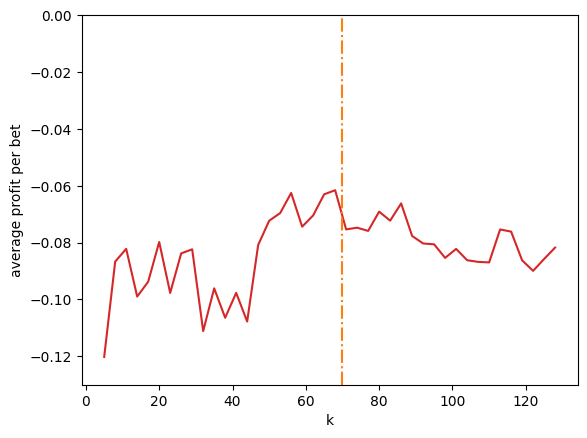

In [134]:
import matplotlib.pyplot as plt

plt.figure('kNN-profit')
plt.plot(knn_data['k'], knn_data['profit'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.vlines([70], [-0.13], [0], colors=['tab:orange'], linestyles=['dashdot'])
plt.xlabel('k')
plt.ylabel('average profit per bet')
plt.ylim((-0.13, 0))
plt.savefig('plots/profit_k_knn.png')
plt.show()

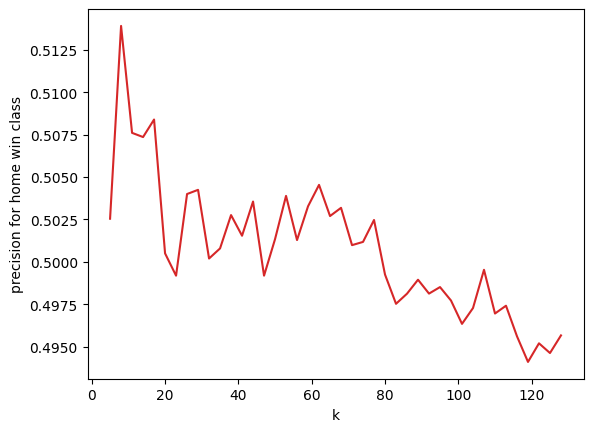

In [135]:
plt.figure('kNN-precision')
plt.plot(knn_data['k'], knn_data['precision'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('k')
plt.ylabel('precision for home win class')
#plt.ylim((-0.13, 0))
plt.savefig('plots/precision_k_knn.png')
plt.show()

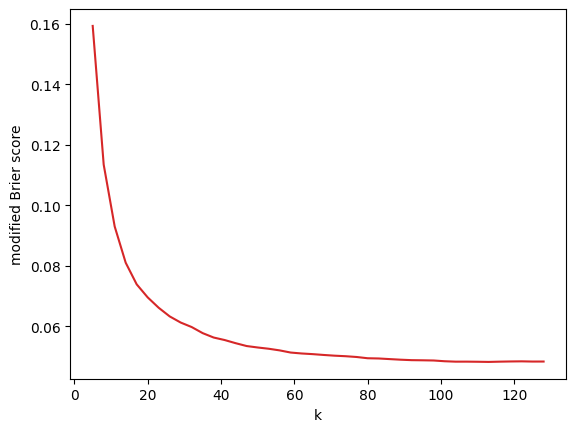

In [136]:
plt.figure('kNN-mbs')
plt.plot(knn_data['k'], knn_data['modified Brier score'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('k')
plt.ylabel('modified Brier score')
#plt.ylim((-0.13, 0))
plt.savefig('plots/mbs_k_knn.png')
plt.show()

In [137]:
# MLP analysis

mlp_data = pd.read_pickle('tables/MLP_analysis_sizes.pickle')

mlp_data

,k,Brier score,precision,recall,F1,profit,modified Brier score
0,1.0,0.614015,0.534844,0.787072,0.633453,-0.090870,0.044510
1,2.0,0.615102,0.532333,0.815182,0.640629,-0.123227,0.047584
2,3.0,0.618111,0.529014,0.800228,0.634292,-0.112597,0.048494
3,4.0,0.633400,0.527140,0.757372,0.619272,-0.106147,0.060167
4,5.0,0.630932,0.516145,0.780998,0.618254,-0.085991,0.059834
5,6.0,0.656303,0.527942,0.738186,0.612432,-0.105420,0.087945
6,7.0,0.641228,0.517686,0.775511,0.618627,-0.118436,0.066513
7,8.0,0.662106,0.511271,0.746488,0.606015,-0.071477,0.084503
8,9.0,0.654298,0.525194,0.766829,0.621556,-0.066921,0.084019


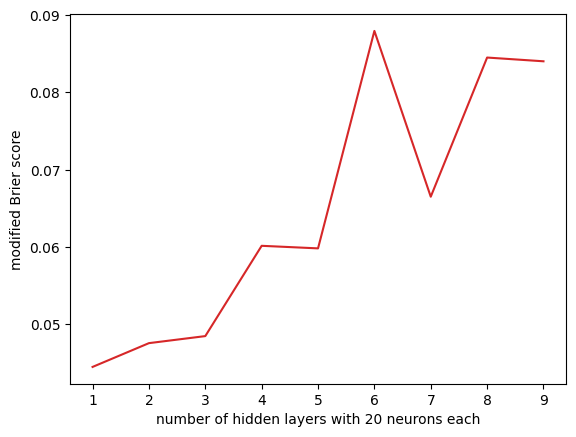

In [138]:
plt.figure('MLP-mbs')
plt.plot(mlp_data['k'], mlp_data['modified Brier score'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('number of hidden layers with 20 neurons each')
plt.ylabel('modified Brier score')
#plt.ylim((-0.13, 0))
plt.savefig('plots/mbs_layers_mlp.png')
plt.show()

In [139]:
data_size_analysis = pd.read_pickle('tables/data_size_analysis.pickle')

In [140]:
data_size_analysis

,data size,Brier score,precision,recall,F1,profit,modified Brier score
0,101.0,0.731724,0.529595,0.742358,0.618182,-0.05432,0.155373
1,111.0,0.728990,0.521739,0.733624,0.609800,-0.07208,0.149615
2,121.0,0.746790,0.518634,0.729258,0.606171,-0.06634,0.156236
3,131.0,0.734122,0.526154,0.746725,0.617329,-0.10324,0.141619
4,141.0,0.742864,0.531987,0.689956,0.600760,-0.11542,0.157306
...,...,...,...,...,...,...,...
265,2711.0,0.652423,0.566434,0.707424,0.629126,-0.03122,0.084441
266,2721.0,0.652648,0.570423,0.707424,0.631579,-0.03572,0.084695
267,2731.0,0.652816,0.570423,0.707424,0.631579,-0.03292,0.084681
268,2741.0,0.652727,0.566434,0.707424,0.629126,-0.02342,0.084715


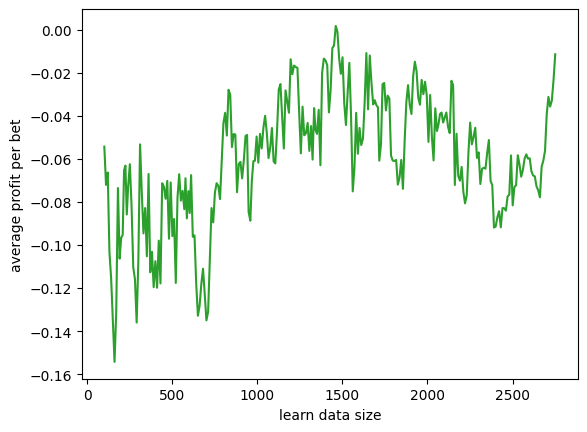

In [141]:
plt.figure('profit-data_size')
plt.plot(data_size_analysis['data size'], data_size_analysis['profit'], c='tab:green')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('learn data size')
plt.ylabel('average profit per bet')
#plt.ylim((-0.13, 0))
plt.savefig('plots/profit-data_size.png')
plt.show()

In [142]:
max(data_size_analysis['profit'])

0.0017399999999997398

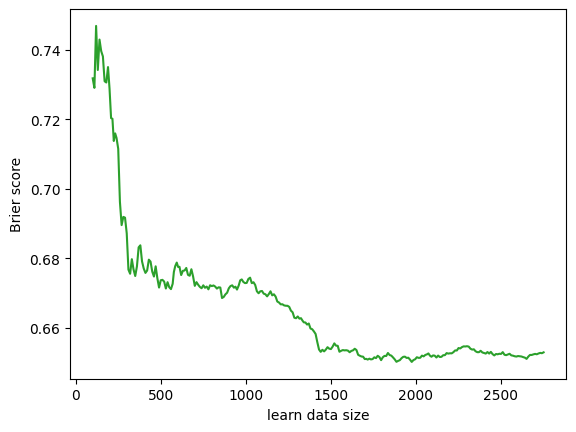

In [143]:
plt.figure('brier-data_size')
plt.plot(data_size_analysis['data size'], data_size_analysis['Brier score'], c='tab:green')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('learn data size')
plt.ylabel('Brier score')
#plt.ylim((-0.13, 0))
plt.savefig('plots/brier-data_size.png')
plt.show()

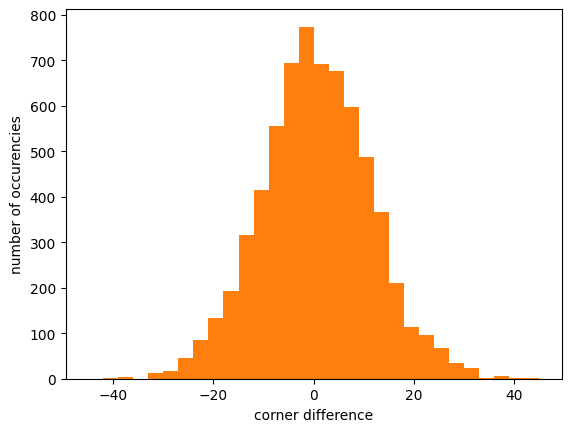

In [144]:
df___ = pd.read_pickle('../simulation/input_data.pickle')

df__ = pd.concat([pd.DataFrame(df___['corners_difference_home']), pd.DataFrame(df___['corners_difference_away']).rename(columns={'corners_difference_away': 'corners_difference_home'})], ignore_index=True)


plt.figure('corner_diff_dist')
plt.hist(df__['corners_difference_home'], bins=[3 * i for i in range(-15, 16)], color='tab:orange')
plt.xlabel('corner difference')
plt.ylabel('number of occurencies')
plt.savefig('plots/corner_diff_dist.png')